In [1]:
from tensorflow import keras
import os
import numpy as np  
import matplotlib.pyplot as plt
from Model_Development.training import resUnet, datagen
import seaborn as sns

In [2]:
train_set, validation_set = datagen.split_data()
dataset_path = "../../processed_data"
image_size = 256
image_dataype = float
batch_size =8
print('Training Dataset:' + str(len(train_set)))
print('Validation Dataset:' + str(len(validation_set)))

Total CT scans :23271
Training Dataset:18617
Validation Dataset:4654


In [3]:
model = resUnet.resUnet()
adam = keras.optimizers.Adam()
model.compile(optimizer=adam, loss=resUnet.dice_coef_loss, metrics=["acc", resUnet.dice_coef])
# model.summary()

In [4]:
model.load_weights(os.path.join('../../models','tumor_weights_final_100epochs.h5'))
valid_datagen = datagen.DataGen(validation_set, dataset_path, scan_size=image_size, batch_size=batch_size)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(8, 256, 256, 3) (8, 256, 256, 1)


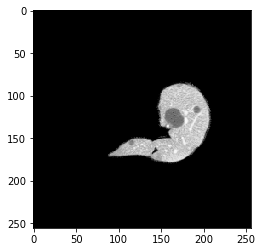

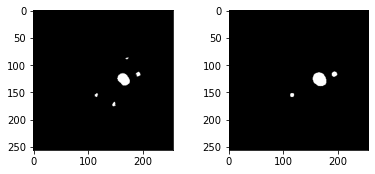

In [5]:
x, y = valid_datagen.__getitem__(55)
predict = model.predict(x)

print(x.shape, predict.shape)

datagen.display_scan(x[1])


fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.reshape(y[1]*255, (image_size, image_size)), cmap="gray")

ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(predict[1]*255, (image_size, image_size)), cmap="gray")



In [6]:

# from numpy import genfromtxt
# from skimage.transform import resize
# liver_mask = genfromtxt('data.csv', delimiter=',')

# import cv2

# img = []

# image_path = '/home/danish/Desktop/1.1_image_354_augrot'


# print(liver_mask.shape)
# plt.imshow(liver_mask)

# dicom_image = pydicom.dcmread(image_path)
# image_datatype = float
# image = datagen.preprocess_scans(dicom_image.pixel_array)

# image = resize(image, [256 ,256])

# image = np.multiply(image, np.clip(liver_mask, 0, 1))

# plt.imshow(image,cmap='gray')
# image = np.array(Image.fromarray(image).resize([image_size, image_size])).astype(image_datatype)

# image = np.stack((image,) * 3, axis=-1)
# img.append(image)
# image = np.array(img)

# print(image.shape)

# weights = model.get_weights()
# new_model = resUnet.resUnet()
# adam = keras.optimizers.Adam()
# new_model.compile(optimizer=adam, loss=resUnet.dice_coef_loss, metrics=["acc", resUnet.dice_coef])

# new_model.set_weights(weights)
# # batch_size=1
# # valid_datagen = datagen.DataGen(validation_set, dataset_path, scan_size=image_size, batch_size=batch_size)

# pred = new_model.predict(image)

# print(pred.shape)
# fig = plt.figure()
# fig.subplots_adjust(hspace=0.4, wspace=0.4)


# ax = fig.add_subplot(1, 2, 2)
# ax.imshow(np.reshape(pred*255, (256, 256)), cmap="gray")


In [11]:
from sklearn.metrics import confusion_matrix
y = []
result = []
## Dataset for testing
for i in range(10, 15, 1):
    x, y = valid_datagen.__getitem__(i)
    result = model.predict(x)
    result = result > 0.4
    # for j in range(len(result)):
    #     fig = plt.figure(figsize=(20,20))
    #     fig.subplots_adjust(hspace=0.4, wspace=0.4)
    #
    #     ax = fig.add_subplot(1, 2, 1)
    #     ax.imshow(np.reshape(y[j]*255, (image_size, image_size)), cmap="gray")
    #     ax = fig.add_subplot(1, 2, 2)
    #     ax.imshow(np.reshape(result[j]*255, (image_size, image_size)), cmap="gray")

print(y.shape, result.shape)

cm_2d =confusion_matrix(y.flatten(),result.flatten())

(8, 256, 256, 1) (8, 256, 256, 1)


In [12]:
cm = cm_2d.ravel()

print("Pixel Accuracy " + str(((cm[3]+cm[0])/(cm[3]+cm[0]+cm[1]+cm[2])*100))+'%' )
print("True Positive Accuracy " + str(((cm[3])/(cm[3]+cm[2])*100))+'%' )

Pixel Accuracy 99.77226257324219%
True Positive Accuracy 84.81123792800702%


In [14]:
def dice(im1, im2):

    im1 = np.asarray(im1).astype(bool)
    im2 = np.asarray(im2).astype(bool)

    if im1.shape != im2.shape:
        raise ValueError("Shape mismatch: im1 and im2 must have the same shape.")

    intersection = np.logical_and(im1, im2)

    return 2. * intersection.sum() / (im1.sum() + im2.sum())


print("Dice Coefficient " + str(dice(y,result)))

Dice Coefficient 0.763938315539739


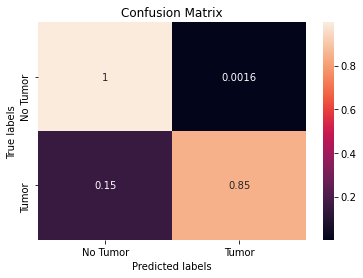

In [15]:
ax= plt.subplot()
cm_2d = cm_2d.astype('float') / cm_2d.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_2d, annot=True, ax = ax)
#annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['No Tumor', 'Tumor']); ax.yaxis.set_ticklabels(['No Tumor', 'Tumor']);